In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set paths
HW_FUZZING_DIR = "/usr/local/google/home/ttrippel/Repos/hw-fuzzing/"
CORE_DIR = HW_FUZZING_DIR + "circuits/double_counter/"
DATA_DIR = CORE_DIR + "data/exp000_poc_fuzz_count_1/"

In [3]:
# Load data
DATA_FILE_0 = DATA_DIR + "fuzz_exp.0/vcd/data.json"
DATA_FILE_1 = DATA_DIR + "fuzz_exp.1/vcd/data.json"
DATA_FILE_2 = DATA_DIR + "fuzz_exp.2/vcd/data.json"
df_0 = pd.read_json(DATA_FILE_0, orient='records')
df_1 = pd.read_json(DATA_FILE_1, orient='records')
df_2 = pd.read_json(DATA_FILE_2, orient='records')

In [4]:
# Load data and stats files
STATS_FILE_0 = DATA_DIR + "fuzz_exp.0/afl_out/fuzzer_stats"
STATS_FILE_1 = DATA_DIR + "fuzz_exp.1/afl_out/fuzzer_stats"
STATS_FILE_2 = DATA_DIR + "fuzz_exp.2/afl_out/fuzzer_stats"
stats_df_0 = pd.read_csv(STATS_FILE_0, sep=':', names=['Key', 'Value'], header=None)
stats_df_1 = pd.read_csv(STATS_FILE_1, sep=':', names=['Key', 'Value'], header=None)
stats_df_2 = pd.read_csv(STATS_FILE_2, sep=':', names=['Key', 'Value'], header=None)

In [5]:
# Extract stats

# Extract runtimes
run_time_0 = (int(stats_df_0['Value'][1]) - int(stats_df_0['Value'][0])) / 3600.0
run_time_1 = (int(stats_df_1['Value'][1]) - int(stats_df_1['Value'][0])) / 3600.0
run_time_2 = (int(stats_df_2['Value'][1]) - int(stats_df_2['Value'][0])) / 3600.0
run_times = [run_time_0, run_time_1, run_time_2]

# Extract execs done
execs_0 = int(stats_df_0['Value'][4])
execs_1 = int(stats_df_1['Value'][4])
execs_2 = int(stats_df_2['Value'][4])
execs = [execs_0, execs_1, execs_2]

# Extract execs/sec
execs_ps_0 = float(stats_df_0['Value'][5])
execs_ps_1 = float(stats_df_1['Value'][5])
execs_ps_2 = float(stats_df_2['Value'][5])
execs_ps = [execs_ps_0, execs_ps_1, execs_ps_2]

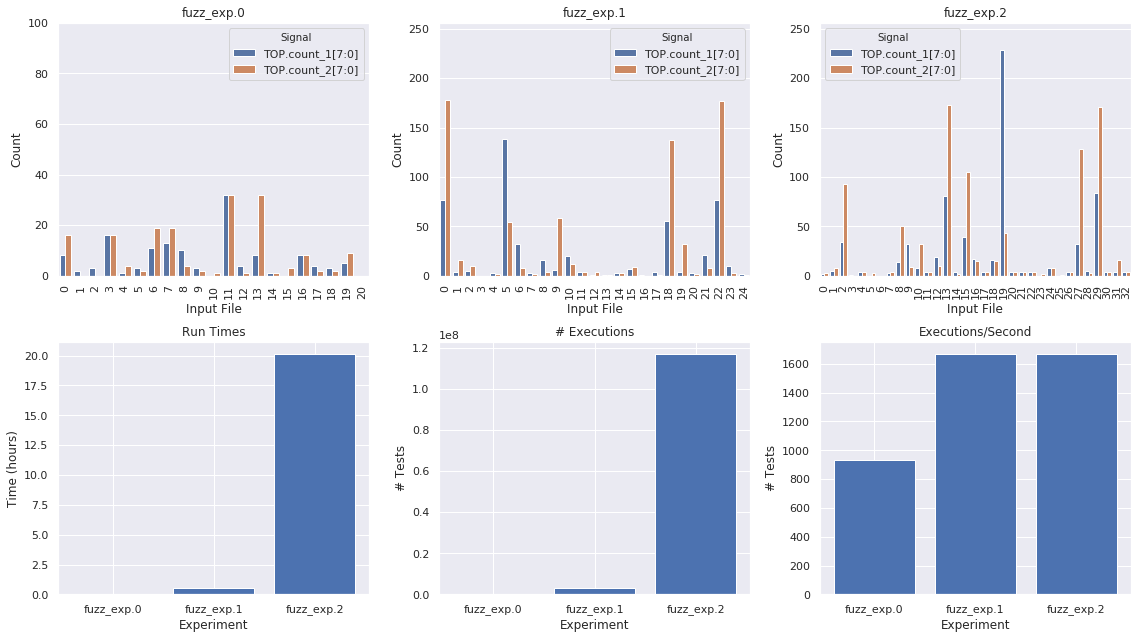

In [17]:
# Plot data
sns.set()
fig, axes = plt.subplots(2, 3, figsize=(16, 9));

# Plot Register Counts
sns.barplot(x="Input", y="Count", hue="Signal", data=df_0, ax=axes[0][0]);
sns.barplot(x="Input", y="Count", hue="Signal", data=df_1, ax=axes[0][1]);
sns.barplot(x="Input", y="Count", hue="Signal", data=df_2, ax=axes[0][2]);
axes[0][0].set_ylim([0, 100]);
axes[0][1].set_ylim([0, 256]);
axes[0][2].set_ylim([0, 256]);
axes[0][0].set_title('fuzz_exp.0');
axes[0][0].set_xlabel('Input File');
axes[0][1].set_title('fuzz_exp.1');
axes[0][1].set_xlabel('Input File');
axes[0][2].set_title('fuzz_exp.2');
axes[0][2].set_xlabel('Input File');
plt.setp(axes[0][0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axes[0][1].xaxis.get_majorticklabels(), rotation=90)
plt.setp(axes[0][2].xaxis.get_majorticklabels(), rotation=90)

# Plot Stats
exp_names = ['fuzz_exp.0', 'fuzz_exp.1', 'fuzz_exp.2'];

axes[1][0].bar(exp_names, run_times);
axes[1][0].set_title('Run Times');
axes[1][0].set_ylabel('Time (hours)');
axes[1][0].set_xlabel('Experiment');

axes[1][1].bar(exp_names, execs);
axes[1][1].set_title('# Executions');
axes[1][1].set_ylabel('# Tests');
axes[1][1].set_xlabel('Experiment');
         
axes[1][2].bar(exp_names, execs_ps);
axes[1][2].set_title('Executions/Second');
axes[1][2].set_ylabel('# Tests');
axes[1][2].set_xlabel('Experiment');

# Adjust layout of subplots to fit
plt.tight_layout();
plt.savefig("exp000_double_counter_poc_fuzz_count_1.pdf", format='PDF')

In [12]:
# Example Input File
# <byte> --> LSB fed to *select* input bit
# <byte>
# <byte>
# <byte>
# <byte>
# <byte>
# .
# .
# .
# <byte>